In this notebook, we extract white-box scores obtained from a forward pass of the generator (white-box), for the training and a test dataset. The hope is that this will give a "bound" on the success rate of black-box attacks.

In [1]:
import pickle
import numpy as np
import networkx as nx
from sklearn.metrics import roc_curve

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with open('graphrnn/output_whitebox_tapas_tu.pkl', 'rb') as ff:
    graph_lens_train, (y_scores_train, y_output_train), graph_lens_test, (y_scores_test, y_output_test) = pickle.load(ff)

Due to the funky structure used by graphRNN, we need to unpack the tensors. Each tensor is of size `(total_number_of_nodes, max_degree, 1)`, where the first dimension is the sum of node sizes for *every* graph in the dataset. That is why we have the graph lens.

In [4]:
def extract(scores, graph_lens):
    graph_scores = []
    i = 0
    for num_nodes in graph_lens:
        graph_scores.append(scores[i:i+num_nodes, :, 0])
        i += num_nodes
    return graph_scores

In [5]:
train_scores_g = extract(y_scores_train, graph_lens_train)

In [6]:
train_structures = extract(y_output_train, graph_lens_train)

In [7]:
test_scores_g = extract(y_scores_test, graph_lens_test)

In [8]:
test_structures = extract(y_output_test, graph_lens_test)

In [9]:
def compute_likelihood(proba_matrix, structure):
    # This is the log-likelihood (and is actually the BCE loss).
    return np.log(proba_matrix[structure==1]).sum() + np.log(1-proba_matrix[structure==0]).sum()

In [10]:
loglik_train = [compute_likelihood(g, m) for g, m in zip(train_scores_g, train_structures)]

In [11]:
loglik_test = [compute_likelihood(g, m) for g, m in zip(test_scores_g, test_structures)]

In [12]:
M = max(np.max(loglik_train), np.max(loglik_test))
m = min(np.min(loglik_train), np.min(loglik_test))
bins = np.linspace(m, M, 10)

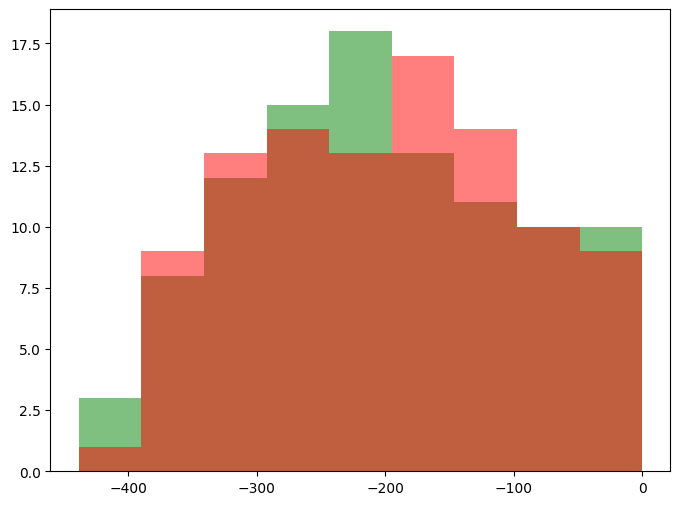

In [13]:
plt.figure(figsize=(8,6))
plt.hist(loglik_train, bins, facecolor='g', alpha=.5)
plt.hist(loglik_test, bins, facecolor='r', alpha=.5);

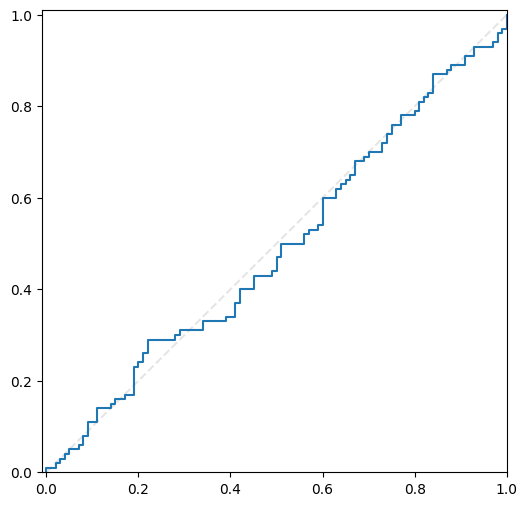

In [14]:
plt.figure(figsize=(6,6))

fpr, tpr, _ = roc_curve([1]*len(loglik_train) + [0]*len(loglik_test), np.concatenate([loglik_train, loglik_test]))

plt.plot([0,1], [0,1], 'k--', alpha=.1)
plt.plot(fpr, tpr)
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01]);

No signal.

The same code for Deezer train.

In [15]:
with open('graphrnn/output_whitebox_deezer_subset_train.pkl', 'rb') as ff:
    graph_lens_train, (y_scores_train, y_output_train), graph_lens_test, (y_scores_test, y_output_test) = pickle.load(ff)

In [16]:
train_scores_g = extract(y_scores_train, graph_lens_train)
train_structures = extract(y_output_train, graph_lens_train)
test_scores_g = extract(y_scores_test, graph_lens_test)
test_structures = extract(y_output_test, graph_lens_test)

In [17]:
loglik_train = [compute_likelihood(g, m) for g, m in zip(train_scores_g, train_structures)]

In [18]:
loglik_test = [compute_likelihood(g, m) for g, m in zip(test_scores_g, test_structures)]

In [22]:
M = max(np.max(loglik_train), np.max(loglik_test))
m = min(np.min(loglik_train), np.min(loglik_test))
bins = np.linspace(m, M, 20)

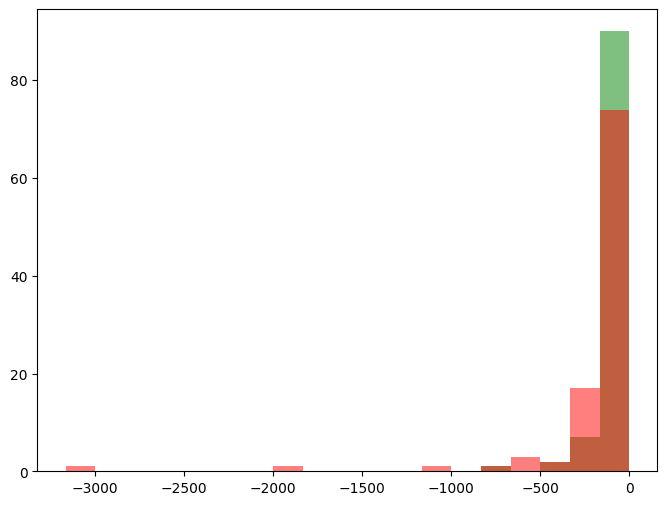

In [23]:
plt.figure(figsize=(8,6))
plt.hist(loglik_train, bins, facecolor='g', alpha=.5)
plt.hist(loglik_test, bins, facecolor='r', alpha=.5);

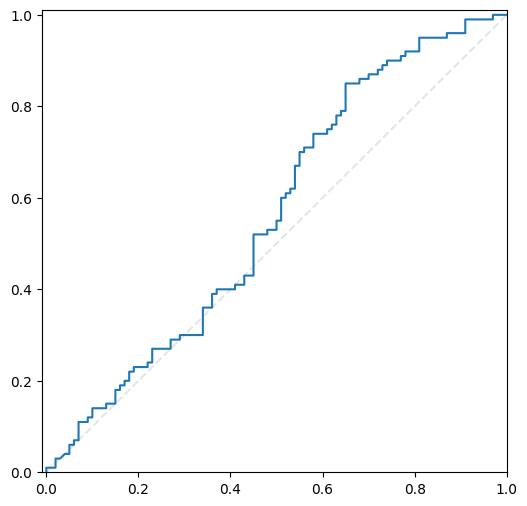

In [21]:
plt.figure(figsize=(6,6))

fpr, tpr, _ = roc_curve([1]*len(loglik_train) + [0]*len(loglik_test), np.concatenate([loglik_train, loglik_test]))

plt.plot([0,1], [0,1], 'k--', alpha=.1)
plt.plot(fpr, tpr)
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01]);

Some signal!?